# WeatherPy
----

In [1]:
# Dependencies
from citipy import citipy
from config import api_key
from datetime import datetime
from pprint import pprint
from scipy.stats import linregress
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import scipy.stats as st
import time

# Set lat and lng ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Create empty lists to store values
lats_lngs = []
cities = []

# Generate random lats and lngs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)

# Find closest cities to generated coordinates using citipy
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, add it to cities list
    if city not in cities:
        cities.append(city)
        
# Count number of cities generated
len(cities)

612

In [3]:
cities

['port alfred',
 'rikitea',
 'codrington',
 'atuona',
 'taolanaro',
 'hobart',
 'jamestown',
 'kavieng',
 'bluff',
 'berezna',
 'rodeo',
 'natal',
 'touros',
 'ushuaia',
 'tuktoyaktuk',
 'new norfolk',
 'skoghall',
 'hobyo',
 'ola',
 'esperance',
 'barentsburg',
 'nikolskoye',
 'metro',
 'san pedro',
 'imbituba',
 'kapit',
 'mehamn',
 'bengkulu',
 'kaniama',
 'kapaa',
 'lebu',
 'bonyhad',
 'dingle',
 'east london',
 'tabas',
 'punta arenas',
 'barrow',
 'cleethorpes',
 'riyadh',
 'lagoa',
 'pacific grove',
 'butaritari',
 'busselton',
 'shimminato',
 'richards bay',
 'nampula',
 'ponta do sol',
 'broome',
 'road town',
 'ilulissat',
 'kulhudhuffushi',
 'bethel',
 'guane',
 'mbale',
 'bambous virieux',
 'cherskiy',
 'clyde river',
 'mangai',
 'souillac',
 'hilo',
 'xining',
 'atar',
 'sivaki',
 'atambua',
 'bathsheba',
 'sitka',
 'progreso',
 'bredasdorp',
 'casablanca',
 'margate',
 'avarua',
 'mataura',
 'tilichiki',
 'azimur',
 'talaja',
 'port hedland',
 'turkan',
 'chokurdakh',
 'a

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [5]:
# Retrieve data from all randomly generated cities
# Create empty lists to store data of cities
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Set initial values of counters
count = 0
set = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop over a list while keeping track of indexes
for index, city in enumerate(cities):
    count += 1
    if count == 51:
        count = 1
        set += 1
        time.sleep(5)
    print(f'Processing Record {count} of Set {set} | {city}')
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("City not found. Skipping...")
        # Append NaN values to ensure row counts match cities (for creating DataFrame)
        lat.append(np.nan)
        lon.append(np.nan)
        max_temp.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | berezna
Processing Record 11 of Set 1 | rodeo
Processing Record 12 of Set 1 | natal
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | skoghall
Processing Record 18 of Set 1 | hobyo
Processing Record 19 of Set 1 | ola
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 22 of Set 1 | nikolskoye
Proc

Processing Record 39 of Set 4 | mujiayingzi
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | shaoguan
Processing Record 42 of Set 4 | bogashevo
Processing Record 43 of Set 4 | nadym
Processing Record 44 of Set 4 | vao
Processing Record 45 of Set 4 | krasnoselkup
Processing Record 46 of Set 4 | yenagoa
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | puerto ayora
Processing Record 49 of Set 4 | puerto escondido
Processing Record 50 of Set 4 | carutapera
Processing Record 1 of Set 5 | castro
Processing Record 2 of Set 5 | bonthe
Processing Record 3 of Set 5 | aasiaat
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | vila velha
Processing Record 6 of Set 5 | qasigiannguit
Processing Record 7 of Set 5 | zharkent
Processing Record 8 of Set 5 | bocaranga
City not found. Skipping...
Processing Record 9 of Set 5 | cidreira
Processing Record 10 of Set 5 | pozo colorado
Processing Record 11 of Set 5 | tulum
Processing Record 12 

City not found. Skipping...
Processing Record 30 of Set 8 | manokwari
Processing Record 31 of Set 8 | bonavista
Processing Record 32 of Set 8 | puerto colombia
Processing Record 33 of Set 8 | makakilo city
Processing Record 34 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 35 of Set 8 | buinsk
Processing Record 36 of Set 8 | alytus
Processing Record 37 of Set 8 | arraial do cabo
Processing Record 38 of Set 8 | aripuana
Processing Record 39 of Set 8 | kuandian
Processing Record 40 of Set 8 | marovoay
Processing Record 41 of Set 8 | douglas
Processing Record 42 of Set 8 | rostovka
Processing Record 43 of Set 8 | kenai
Processing Record 44 of Set 8 | padampur
Processing Record 45 of Set 8 | svetlyy
Processing Record 46 of Set 8 | dalbandin
Processing Record 47 of Set 8 | bhigvan
Processing Record 48 of Set 8 | rybnaya sloboda
Processing Record 49 of Set 8 | cloquet
Processing Record 50 of Set 8 | batouri
Processing Record 1 of Set 9 | dunhua
Processing Record 2 of Set 9 

Processing Record 16 of Set 12 | kassala
Processing Record 17 of Set 12 | karari
Processing Record 18 of Set 12 | passo fundo
Processing Record 19 of Set 12 | buluang
Processing Record 20 of Set 12 | san ferdinando di puglia
Processing Record 21 of Set 12 | lac du bonnet
Processing Record 22 of Set 12 | takoradi
Processing Record 23 of Set 12 | lowestoft
Processing Record 24 of Set 12 | kerteh
City not found. Skipping...
Processing Record 25 of Set 12 | tecoanapa
Processing Record 26 of Set 12 | sobolevo
Processing Record 27 of Set 12 | maningrida
Processing Record 28 of Set 12 | teneguiban
City not found. Skipping...
Processing Record 29 of Set 12 | balkanabat
Processing Record 30 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 31 of Set 12 | ayagoz
Processing Record 32 of Set 12 | keti bandar
Processing Record 33 of Set 12 | santa cruz
Processing Record 34 of Set 12 | puerto ayacucho
Processing Record 35 of Set 12 | mosquera
Processing Record 36 of Set 12 | volnovakha
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Place data into a DataFrame
city_weather_df = pd.DataFrame({"City": cities,
                               "Lat": lat,
                               "Lng": lon,
                               "Max Temp": max_temp,
                               "Humidity": humidity,
                               "Cloudiness": cloudiness,
                               "Wind Speed": wind_speed,
                               "Country": country,
                               "Date": date})
# Drop null values
city_weather_df = city_weather_df.dropna()
print(city_weather_df.count())

# Export city data into a csv file
city_weather_df.to_csv("./output/city_weather_data.csv", index=False)

# Read into saved csv file
weather_df = pd.read_csv("./output/city_weather_data.csv")
weather_df

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.59,26.89,16.74,48.0,0.0,3.41,ZA,1.601306e+09
1,rikitea,-23.12,-134.97,23.54,81.0,4.0,3.82,PF,1.601306e+09
2,codrington,-38.27,141.97,5.08,93.0,45.0,4.03,AU,1.601306e+09
3,atuona,-9.80,-139.03,25.22,75.0,6.0,7.40,PF,1.601306e+09
4,hobart,-42.88,147.33,9.00,76.0,90.0,1.50,AU,1.601306e+09
...,...,...,...,...,...,...,...,...,...
560,san miguel,13.48,-88.18,27.00,100.0,2.0,0.51,SV,1.601306e+09
561,santarem,-2.44,-54.71,31.00,70.0,20.0,4.10,BR,1.601306e+09
562,port arthur,38.80,121.27,19.00,82.0,100.0,2.00,CN,1.601306e+09
563,manakara,-22.13,48.02,22.55,80.0,0.0,4.81,MG,1.601306e+09


In [11]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.924442,10.542053,19.593381,68.217699,52.798230,3.753204,1.601306e+09
std,32.658528,87.749862,9.736834,22.611749,37.962818,2.337115,1.529292e+02
min,-54.800000,-175.200000,-10.250000,8.000000,0.000000,0.200000,1.601305e+09
25%,-6.220000,-65.710000,12.000000,57.000000,17.000000,2.030000,1.601306e+09
50%,22.670000,17.940000,21.670000,75.000000,64.000000,3.300000,1.601306e+09
75%,47.580000,76.630000,27.000000,85.000000,90.000000,5.070000,1.601306e+09
max,78.220000,178.420000,41.000000,100.000000,100.000000,13.490000,1.601306e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# Check for cities with humidity over 100%
weather_df["Humidity"].sort_values()

274      8.0
332      8.0
284      8.0
145      8.0
215      9.0
       ...  
221    100.0
560    100.0
540    100.0
107    100.0
226    100.0
Name: Humidity, Length: 565, dtype: float64

There are no cities with humidity over 100% in our data


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

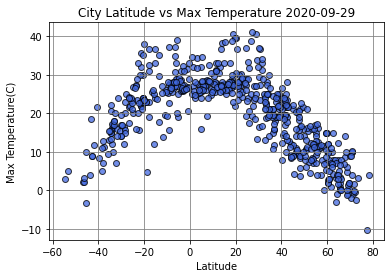

In [14]:
# Using python datetime module to determine current date at time of analysis
date_of_analysis = datetime.date(datetime.now())

# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title(f"City Latitude vs Max Temperature {date_of_analysis}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_temp.png")

# Show chart
plt.show()

This scatter plot shows how a city's maximum temperature is affected by its latitude. The temperatures are highest close to the equator. The temperatures decline moving away from the equator, both towards the Nothern and Southern hemisphere. The temperatures in both hemispheres are similar due to the time of the year, both hemispheres experiencing autumn and spring respectively. It can be concluded from this chart that temperatures are highest closest to the equator, and they are lowest for both hemispheres (during this time of year) as cities in these regions transition into summer and winter.

## Latitude vs. Humidity Plot

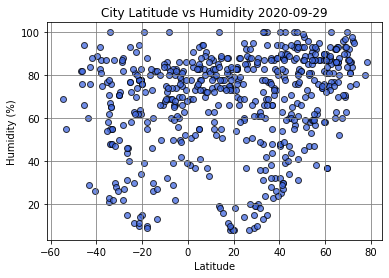

In [15]:
# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title(f"City Latitude vs Humidity {date_of_analysis}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_humidity.png")

# Show chart
plt.show()

This scatter plot shows how a city's humidity is affected by its latitude. The data points are quite evenly scattered throughout the chart. This is an indication of a weak correlation between latitude and humidity as humidity is not much affected by a city's position to the equator. However, it is worth noting that most cities have higher humidities of 60-100% regardless of their latitudes. There are few cities with extremely low humidities situated close to the equator.

## Latitude vs. Cloudiness Plot

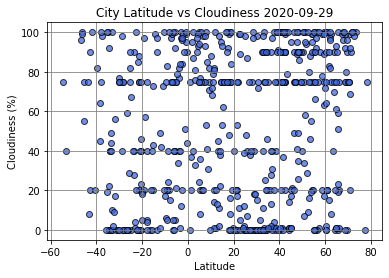

In [16]:
# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title(f"City Latitude vs Cloudiness {date_of_analysis}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_cloudiness.png")

# Show chart
plt.show()

This scatter plot shows how a city's cloudiness is affected by its latitude. By observing the graph, most cities have cloudiness either really high or really low. These cities with similar cloudiness are also located in different latitudinal positions. As the data is quite evenly spread throughout the graph, this indicates that there is a weak correlation between the latitude and cloudiness.

## Latitude vs. Wind Speed Plot

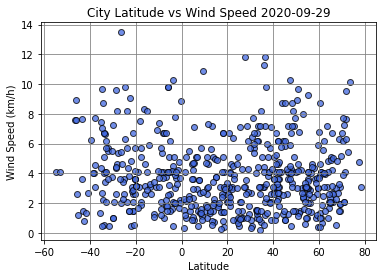

In [34]:
# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title(f"City Latitude vs Wind Speed {date_of_analysis}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_windspeed.png")

# Show chart
plt.show()

This scatter plot shows how a city's wind speed is affected by its latitude. By observing the graph, most of the data points are clustered around the lower ranges of the graph. This shows that cities regardless of their latitudinal positions generally experience lower wind speeds. As the data points are quite evenly spread throughout the graph, there is a weak correlation between latitude and wind speed. It is also worth noting that some cities further away from the equator (latitude 20 to 40 and latitude -20 to -40) have higher wind speeds.

## Linear Regression

In [18]:
# Create a function to plot linear regression
def create_linear_regression_plot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Using pyplot to create scatter plot
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim != None:
        plt.ylim = (0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f'{hemisphere} Hemisphere - {x_label} vs. {y_label} {today}')
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Print correlation between both factors
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    
    # Save linear regression plot as png file
    plt.savefig(f"./output/{hemisphere}_{x_label}_vs_{y_label}.png")
    
    return plt.plot(x_values,regress_values,"r-")

In [19]:
# Create Nothern and Souther Hemisphere DataFrames
nothern_hemisphere = weather_df.loc[weather_df["Lat"] > 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7171272481757185
The correlation between both factors is -0.85


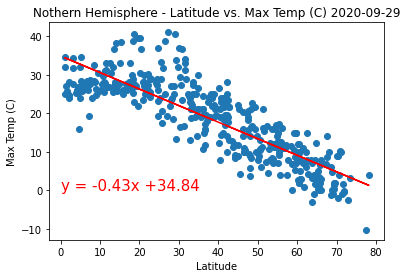

In [20]:
x_values = nothern_hemisphere["Lat"]
y_values = nothern_hemisphere["Max Temp"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temp (C)", "Nothern", (0, 0), ylim=None)

The linear regression model above shows a strong negative correlation between latitude and maximum temperature in the northern hemisphere. This means that it is getting colder as we move further away from the equator towards north. This model shows that cities further up the nothern hemisphere generally experience colder temperatures compared to countries closer to the equator. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5516337929976529
The correlation between both factors is 0.74


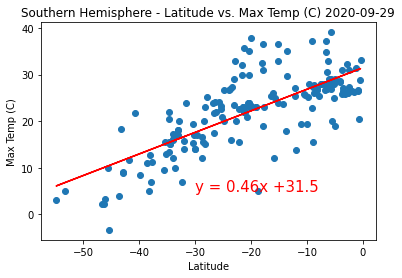

In [21]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temp (C)", "Southern", (-30, 5), ylim=None)

The linear regression model above shows a strong positive correlation between latitude and maximum temperature in the southern hemisphere. This model shows that cities are generally warmer closer to the equator and cooler further south.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.041990205340729746
The correlation between both factors is 0.2


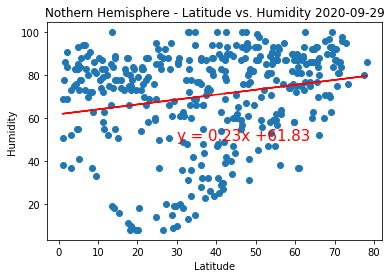

In [22]:
x_values = nothern_hemisphere["Lat"]
y_values = nothern_hemisphere["Humidity"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Humidity", "Nothern", (30, 50), ylim=None)

The linear regression model above shows a very weak positive correlation between latitude and humidity in the northern hemisphere. This means that the humidity of cities increase slightly moving further away from the equator. However, the relatively flat slope of the model indicates that the increase in humidity is only minor.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.000885460486121809
The correlation between both factors is 0.03


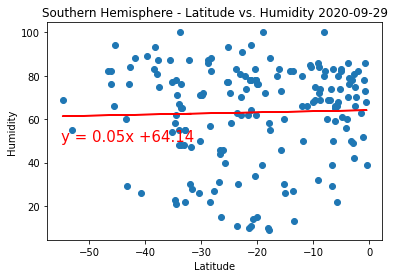

In [33]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Humidity", "Southern", (-55,50), ylim=None)

The linear regression model above shows a negligible positive correlation between latitude and humidity in the southern hemisphere. This means that the humidity of cities increase slightly moving closer to the equator. However, the flat nature of the model's slope indicates that the increase in humidity is very insignificant.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01385732155375347
The correlation between both factors is 0.12


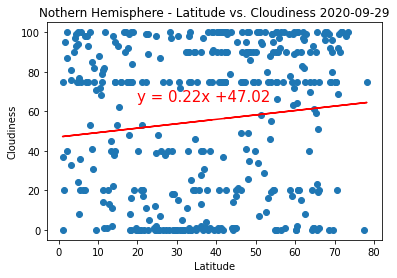

In [32]:
x_values = nothern_hemisphere["Lat"]
y_values = nothern_hemisphere["Cloudiness"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Cloudiness", "Nothern", (20, 65), ylim=None)

The linear regression model above shows a very weak (or possibly none) positive correlation between latitude and cloudiness in the northern hemisphere. This is supposed to mean that the cloudiness should be increasing as we move further up north. However, due to the scattered nature of the data points, we can be confident that there exists no relationship between latitude and cloudiness in the northern hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00826741006685673
The correlation between both factors is 0.09


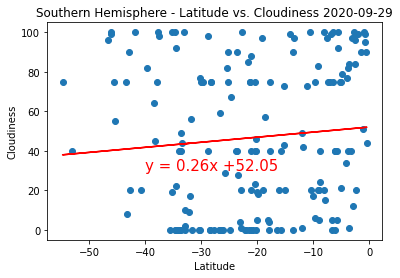

In [25]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Cloudiness", "Southern", (-40, 30), ylim=None)

The linear regression model above shows a very weak (or possibly none) positive correlation between latitude and cloudiness in the southern hemisphere. This is supposed to mean that the cloudiness should be increasing as we move closer to the equator. However, due to the scattered nature of the data points, we can be confident that there exists no relationship between latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.020668888585738815
The correlation between both factors is 0.14


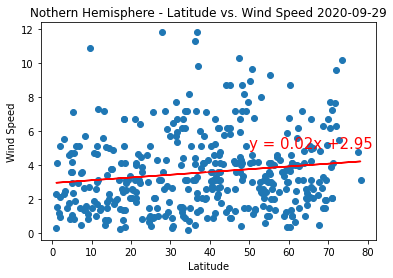

In [31]:
x_values = nothern_hemisphere["Lat"]
y_values = nothern_hemisphere["Wind Speed"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Wind Speed", "Nothern", (50,5), ylim=None)

The linear regression model above shows a very weak positive correlation between latitude and wind speed in the northern hemisphere. This is supposed to mean that the wind speeds should be increasing as we move closer to the equator. However, most of the data points are scattered evenly within the ranges of low to moderate wind speeds, showing that most cities experience similar wind speeds regardless of their latitudinal positions. Thus, indicating that a relationship between latitude and wind speed in the northern hemisphere does not exist.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00871782537093433
The correlation between both factors is -0.09


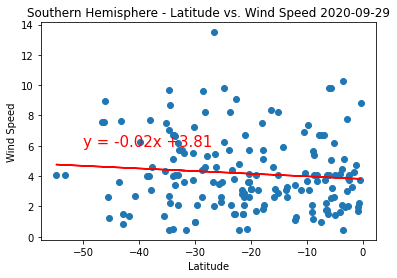

In [30]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Wind Speed", "Southern", (-50, 6), ylim=None)

The linear regression model above shows a very weak negative correlation between latitude and wind speed in the southern hemisphere. This is supposed to mean that the wind speeds should be decreasing as we move closer to the equator. Despite one outlier, the other data points are quite evenly scattered, with them slightly clustered moving towards the equator. This shows that there is not a relationship between latitude and wind speed in the southern hemisphere.